In [6]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
import copy
from openpyxl import load_workbook
from scipy.optimize import minimize_scalar
import functions as func

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})




import ipywidgets as widgets # For interactive plots/buttons
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
col = ['r', 'b', 'g', 'y', 'm', 'c']


 
from matplotlib import cm
# plt.style.use('seaborn-whitegrid')
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass
path = 'exports/export2507/'


In [7]:
model = HANCModelClass(name = 'alpha = 0.6') 

par = model.par
ss = model.ss

max_iter_solve = 50000
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.G = 0.25

# Initial steady state
model.par.sigma = 0.6
model.find_ss()



In [8]:
# Path for saving the results
model.max_iter_solve = 50000
export = False
path = 'exports/exports2707/'


In [9]:

list_G =  [ 0.15, 0.2, 0.25, 0.3 ]#, 0.35]#, 0.4] #, 0.5 ] #[0.05, 0.1,  0.2, 0.3]  #,  0.6, 0.8 ]#, 1.0]
list_TFP = [1.0] #, 2.0 , 5.0, 10.0, 50.0]

# model.max_iter_solve = 10_000


vars = ['w', 'wt', 'ELL_hh', 'G_exp', 'G_share', 'G_exp_share', 'U_hh', 'C_hh', 'Y', 'A_hh']
CDF_vars = ['u', 'a', 'ell', 'c',  'inc', 'mu']

#  Models with sigma = 0.6

In [16]:
# sigma = 0.7 Alpha = 0.6

def dict_(sigma, alpha):
    model_ = model.copy(name = f'Sigma = {sigma}, alpha = {alpha}')
    model_.par.sigma = sigma
    model_.par.alpha = sigma

    dict_ = func.create_model_dict(model_,list_tfp=list_TFP, list_G =list_G)

    return dict_

In [17]:
dict_s06_a06 = dict_(sigma=0.6, alpha=0.6)
dict_s06_a07 = dict_(sigma=0.6, alpha=0.7)

dict_s07_a06 = dict_(sigma=0.7, alpha=0.6)
dict_s07_a07 = dict_(sigma=0.7, alpha=0.7)

Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.15
solved for TFP = 1.0 G = 0.2
solved for TFP = 1.0 G = 0.25
solved for TFP = 1.0 G = 0.3
Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.15
solved for TFP = 1.0 G = 0.2
solved for TFP = 1.0 G = 0.25
solved for TFP = 1.0 G = 0.3
Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.15
TFP = 1.0 G = 0.2 did not converge
TFP = 1.0 G = 0.25 did not converge
TFP = 1.0 G = 0.3 did not converge
Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.15
TFP = 1.0 G = 0.2 did not converge
TFP = 1.0 G = 0.25 did not converge
TFP = 1.0 G = 0.3 did not converge


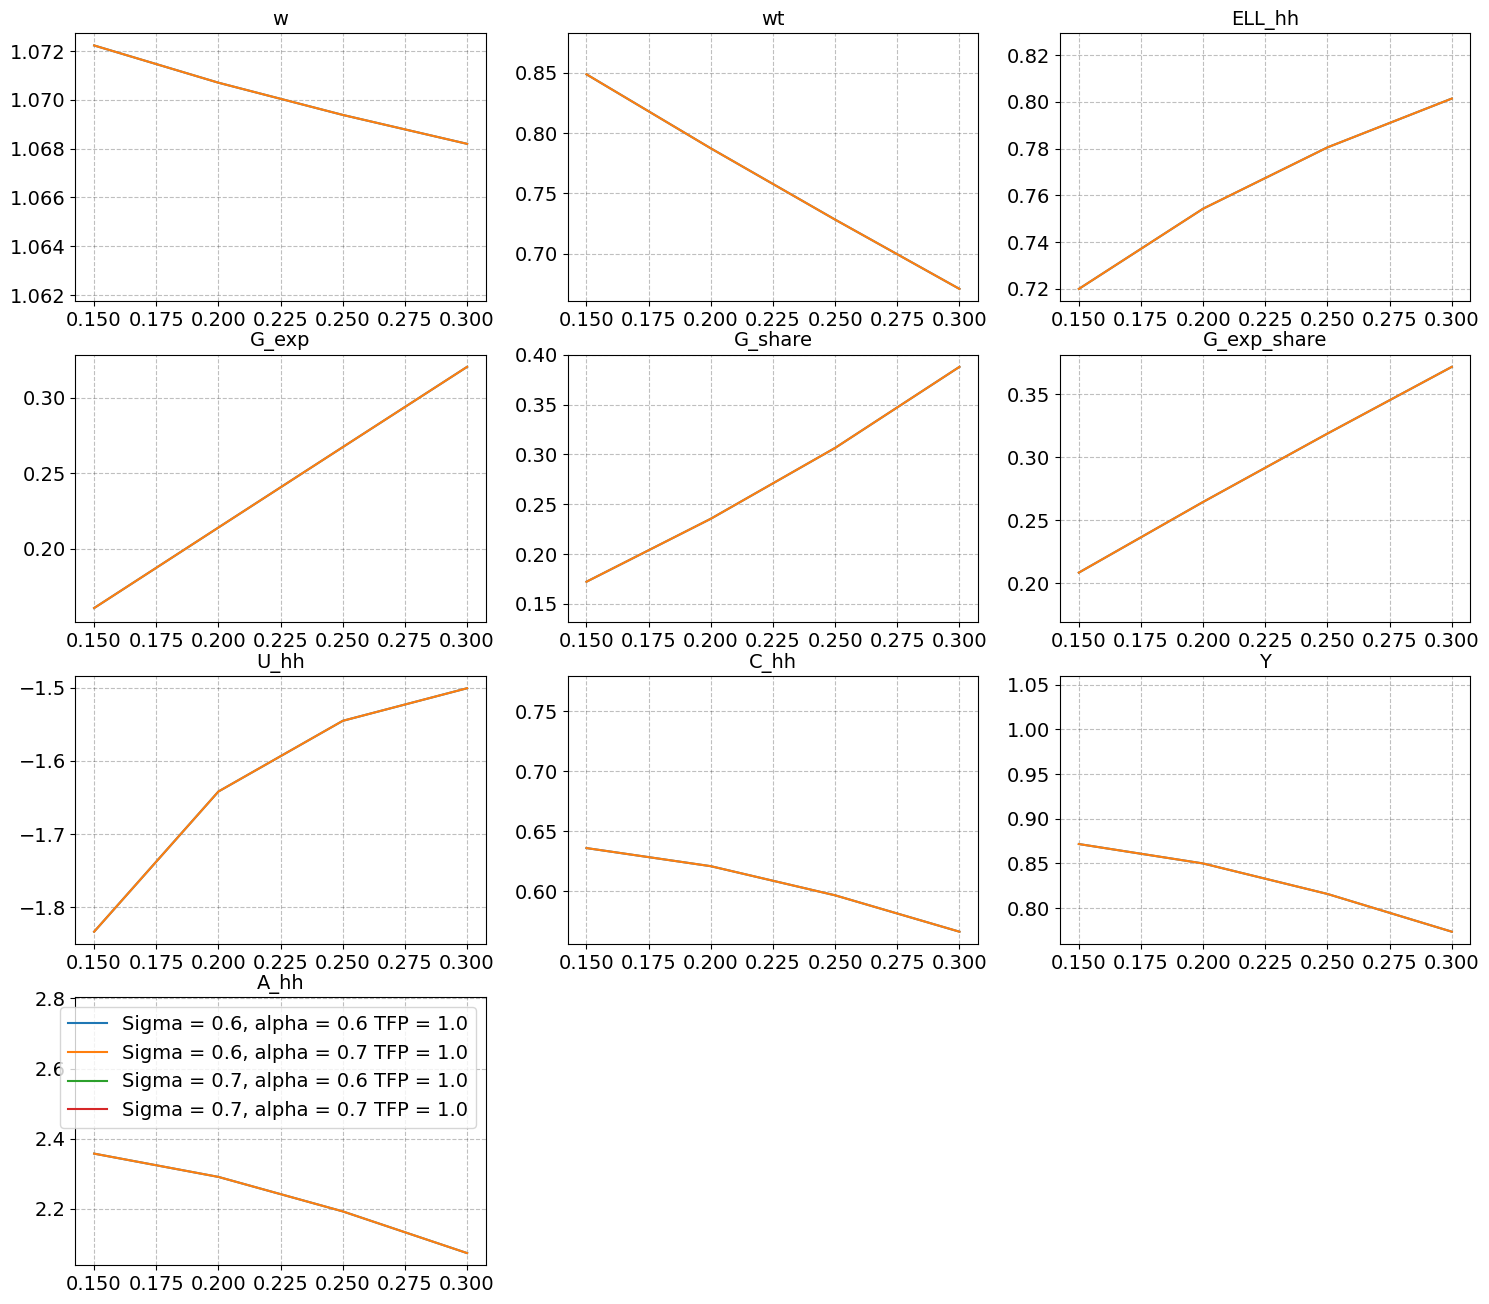

In [23]:
func.plot_G_compare([ dict_s06_a06,dict_s06_a07,dict_s07_a06,dict_s07_a07 ], vars, list_TFP= list_TFP, list_G=list_G)


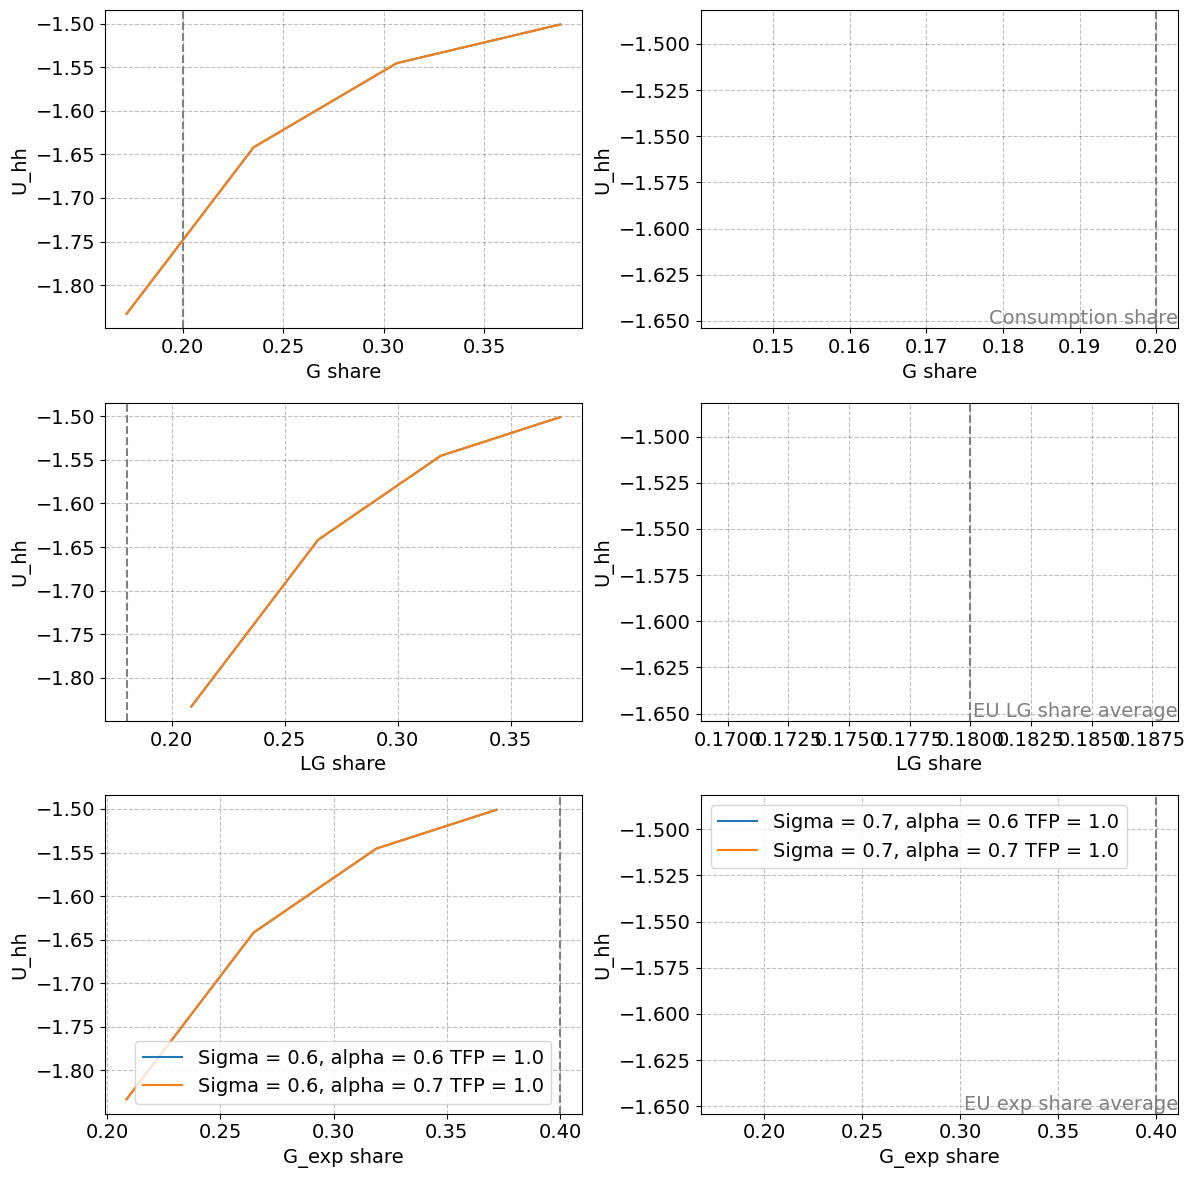

In [21]:

plot_FindAlpha_s11 = plot_G_compare(
    models_list_base=[  dict_s06_a06, dict_s06_a07],
    models_list_s11=[  dict_s07_a06, dict_s07_a07],
    varnames=['U_hh'], list_G=list_G,
    ncols=2, nrows=3)

In [6]:
# sigma = 0.7 Alpha = 0.7
model_s07_a07 = model.copy(name = 'Sigma = 0.7, alpha = 0.7')
model_s07_a07.par.alpha = 0.7

dict_s07_a07 = func.create_model_dict(model_s07_a07,list_tfp=list_TFP, list_G =list_G)

Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.15
solved for TFP = 1.0 G = 0.2
solved for TFP = 1.0 G = 0.25
solved for TFP = 1.0 G = 0.3


In [1]:
# sigma = 0.6 Alpha = 0.6
model_s07_a071 = model.copy(name = 'Sigma = 0.7, alpha = 0.71')
model_s07_a071.par.alpha = 0.71

dict_s07_a071 = func.create_model_dict(model_s07_a071,list_tfp=list_TFP, list_G =list_G)

NameError: name 'model' is not defined

In [ ]:
# sigma = 0.6 Alpha = 0.7
model_s07_a071 = model.copy(name = 'Sigma = 0.7, alpha = 0.71')
model_s07_a071.par.alpha = 0.71

dict_s07_a071 = func.create_model_dict(model_s07_a071,list_tfp=list_TFP, list_G =list_G)

In [11]:
# sigma = 011 Alpha = 0.6
model_s11_a06 = model.copy(name = 'Sigma = 1.1, alpha = 0.6')
model_s11_a06.par.sigma = 1.1
model_s11_a06.par.alpha = 0.6
dict_s11_a06 = func.create_model_dict(model_s11_a06,list_tfp=list_TFP, list_G =list_G)

Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.15
solved for TFP = 1.0 G = 0.2
solved for TFP = 1.0 G = 0.25
solved for TFP = 1.0 G = 0.3


In [12]:
# sigma = 011 Alpha = 0.7
model_s11_a07 = model.copy(name = 'Sigma = 1.1, alpha = 0.7')
model_s11_a07.par.sigma = 1.1
model_s11_a07.par.alpha = 0.7
dict_s11_a07 = func.create_model_dict(model_s11_a07,list_tfp=list_TFP, list_G =list_G)

Solving for TFP = 1.0
solved for TFP = 1.0 G = 0.15
solved for TFP = 1.0 G = 0.2
solved for TFP = 1.0 G = 0.25
solved for TFP = 1.0 G = 0.3


In [13]:
def plot_G_compare(models_list_base, models_list_s11, varnames, list_G, ncols=2, nrows=3, title=None):
    """Plot the steady state values of a variable in the models over G
    Args:
    varnames (list): List of variable names
    models: Dictionary of models
    list_G (list): List of G values
    ncols (int): Number of columns in the plot
    title (str): Title of the plot

    Returns:
    Plot of the steady state values of the variables over G with each TFP level plotted"""
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows), dpi=100)
    
    if title is not None:
        fig.suptitle(title, fontsize=16)
        
    for row in range(nrows):
        for col, models_list in enumerate([models_list_base, models_list_s11]):
            ax = axes[row, col]
            if row == 0:
                ylabel = 'U_hh'
                vertical_line_value = 0.2
                vertical_line_label = 'Consumption share'
            elif row == 1:
                ylabel = 'U_hh'
                vertical_line_value = 0.18
                vertical_line_label = 'EU LG share average'
            elif row == 2:
                ylabel = 'U_hh'
                vertical_line_value = 0.4
                vertical_line_label = 'EU exp share average'
            
            for models in models_list:
                for TFP in list_TFP:
                    list_values = []
                    list_G_share = []
                    list_LG_share = []
                    list_G_exp_share = []

                    for G in list_G:
                        try:
                            value = models[f'TFP = {TFP}'][f'G = {G}'].ss.__dict__['U_hh']
                            G_share = models[f'TFP = {TFP}'][f'G = {G}'].ss.G_share
                            LG_share = models[f'TFP = {TFP}'][f'G = {G}'].ss.L_G / (models[f'TFP = {TFP}'][f'G = {G}'].ss.L)
                            G_exp_share = models[f'TFP = {TFP}'][f'G = {G}'].ss.G_exp_share

                            list_values.append(value)
                            list_G_share.append(G_share)
                            list_LG_share.append(LG_share)
                            list_G_exp_share.append(G_exp_share)
                        except:
                            list_values.append(np.nan)
                            list_G_share.append(np.nan)
                            list_LG_share.append(np.nan)
                            list_G_exp_share.append(np.nan)
                    
                    if row == 0:
                        ax.plot(list_G_share, list_values)#, label=f'{models["name"]} TFP = {TFP}')
                        ax.set_xlabel('G share')
                    elif row == 1:
                        ax.plot(list_LG_share, list_values)#, label=f'{models["name"]} TFP = {TFP}')
                        ax.set_xlabel('LG share')
                    elif row == 2:
                        ax.plot(list_G_exp_share, list_values, label=f'{models["name"]} TFP = {TFP}')
                        # ax.legend(bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=3)
                        ax.set_xlabel('G_exp share')
                        ax.legend()
            
            ax.axvline(x=vertical_line_value, color='grey', linestyle='--')
            if col == 1:
                # ax.text(vertical_line_value, ax.get_ylim()[1], vertical_line_label, color='grey', verticalalignment='bottom')
                ax.text(1, 0, vertical_line_label, color='grey', verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)

            # ax.set_xlabel('G share')
            ax.set_ylabel(ylabel)
            ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
            # ax.legend()

    
    plt.tight_layout()
    # plt.show()

# Example usage



    
# plt.savefig(path + 'FindAlpha_base.png', dpi = 300)


In [9]:

def plot_G_compare(models_list_base, models_list_s11, varnames, list_G, ncols=3, title=None):
    """Plot the steady state values of a variable in the models over G
    Args:
    varnames (list): List of variable names
    models: Dictionary of models
    list_G (list): List of G values
    ncols (int): Number of columns in the plot
    title (str): Title of the plot

    Returns:
    Plot of the steady state values of the variables over G with each TFP level plotted"""


    num = len(varnames)
    nrows = num//ncols+1
    if num%ncols == 0: nrows -= 1
    
    fig = plt.figure(figsize=(6*ncols,4*nrows),dpi=100)
    # Setting title 
    # if title == None:

    if title != None:
        fig.suptitle(title, fontsize=16)


    for i,varname in enumerate(varnames):
        
        ax = fig.add_subplot(nrows,ncols,i+1)
        title = varname
        ax.set_title(title,fontsize=14)

        for models in models_list_base:

            for TFP in list_TFP:

                list_values = []
                list_G_share = []
                list_LG_share = []
                list_G_exp_share = []

                for G in list_G:
                    try:
                        value = models[f'TFP = {TFP}'][f'G = {G}'].ss.__dict__['U_hh']
                        G_share = models[f'TFP = {TFP}'][f'G = {G}'].ss.G_share
                        LG_share = models[f'TFP = {TFP}'][f'G = {G}'].ss.L_G / (models[f'TFP = {TFP}'][f'G = {G}'].ss.L)
                        G_exp_share = models[f'TFP = {TFP}'][f'G = {G}'].ss.G_exp_share

                        list_values.append(value)
                        list_G_share.append(G_share)
                        list_LG_share.append(LG_share)
                        list_G_exp_share.append(G_exp_share)

                    except:
                        list_values.append(np.nan)
                        list_G_share.append(np.nan)



                # ax.plot(list_G_share, list_values, label=f'{models["name"] } TFP = {TFP}')
                # ax.plot(list_LG_share, list_values, label=f'{models["name"] } TFP = {TFP}')
                ax.plot(list_G_exp_share, list_values, label=f'{models["name"] } TFP = {TFP}')
                #Adding more close gride lines
                ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 


                #ploting on the same graph 2 axis


    
                ax.set_xlabel('G share')
                ax.set_ylabel('Value')

    ax.legend()


#plot_G_compare(models_list_base = [dict_base, dict_base_alpha05, dict_base_alpha07], models_list_s11 = [dict_s11, dict_s11_alpha05, dict_s11_alpha07] , list_G, ncols=3) 

#Modify this code. I want 2 collums and 3 rows. In the first collum I want the values that come from models_list_base. In the second collum i want the vales associated with models_list_s11. In the first row I want U_hh ploted against list_G_share. In the second row i want U_hh ploted against list_LG_share, in the 3 I want U_hhh ploted against list_G_exp_share. I want a vertial line in each plot. With the value 0.3 in the first row and the lable "EU G_share". In the second row firgures i want a vertical line with the value 0.2 and the label " Eu LG share average",  In the third row firgures i want a vertical line with the value 0.23 and the label " Eu exp share average". I want all vertical lines to be dashed.